In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 50 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 40
symbols = ['^NYA', '^IXIC']
tickers = {'^NYA': 'nyse',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv'}

ITERS: 1





NYSE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nyse_40yr_3param.json
{   'params': {   'amounts': [0.99, -0.99, 0.99],
                  'qs': [-0.04407797521899044, 0.99, -0.99]},
    'sd': 0.08554468318536211,
    'window': 20}
 1: Final value: $20640.13 (window = 20; sd = 0.086)

% in now: 0.9999999917611684
Actions taken: 200
Wrote params to ../data/pct_params/nyse_40yr_3param.json


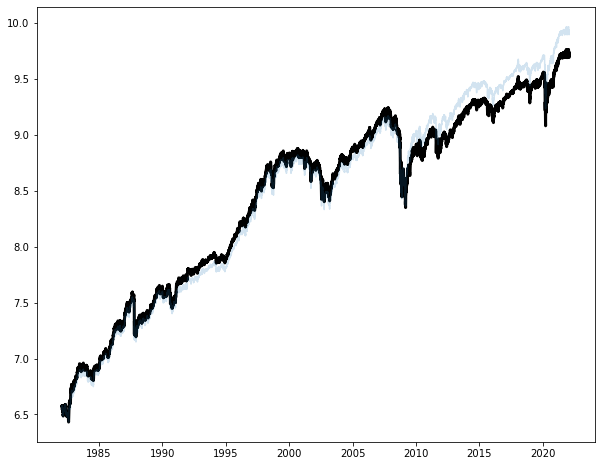

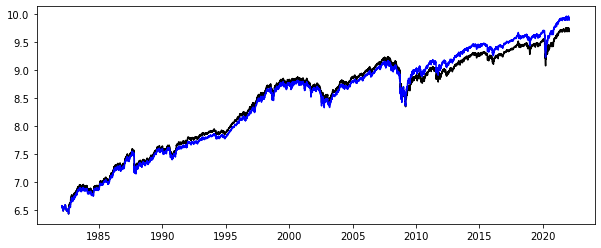

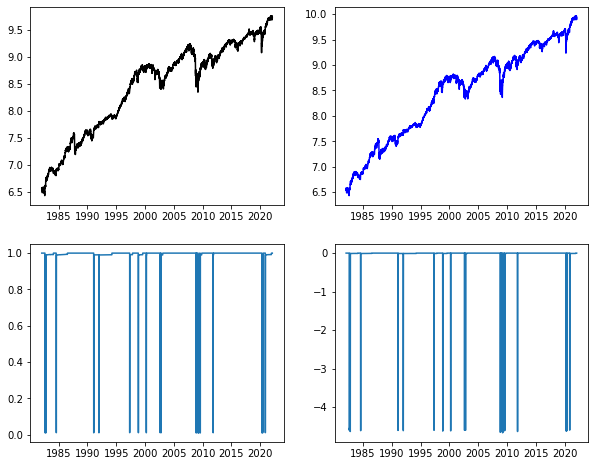



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nyse_40yr_2param.json
{   'params': {   'amounts': [0.99, -0.9886618317390004],
                  'qs': [-0.07665529195537588, -0.9787977757897187]},
    'sd': 0.22833749495548733,
    'window': 206}
 1: Final value: $18007.21 (window = 206; sd = 0.228)

% in now: 1.0
Actions taken: 61
Wrote params to ../data/pct_params/nyse_40yr_2param.json


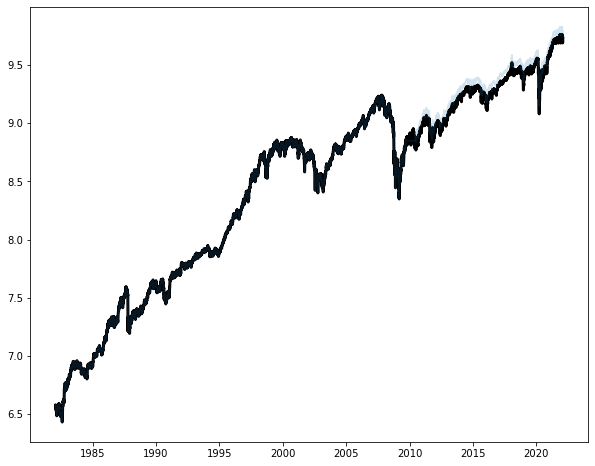

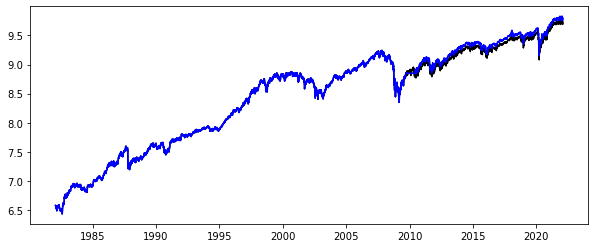

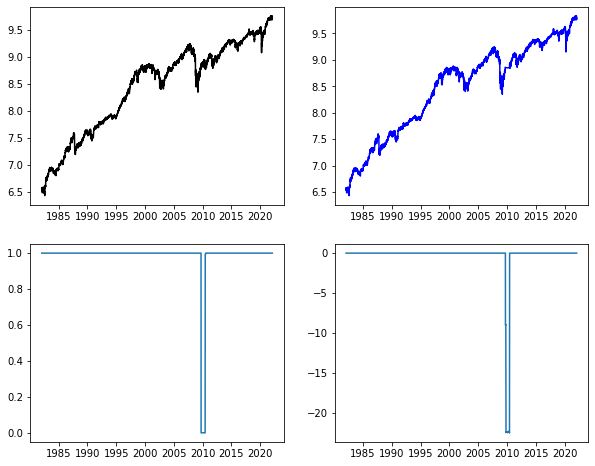



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nyse_40yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.4180193214438457]},
    'sd': 0.13047125778304905,
    'window': 20}
 1: Final value: $16828.98 (window = 20; sd = 0.130)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nyse_40yr_1param.json


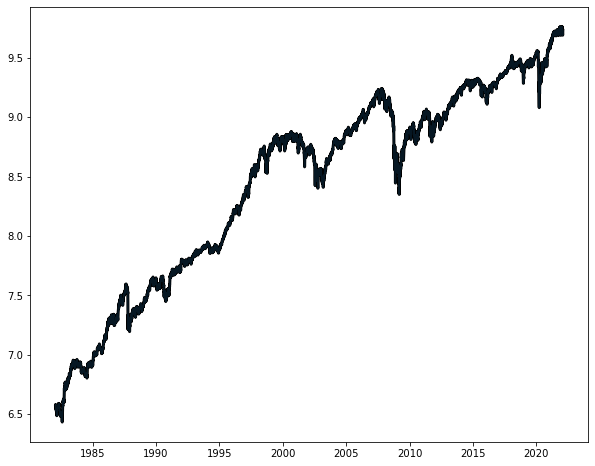

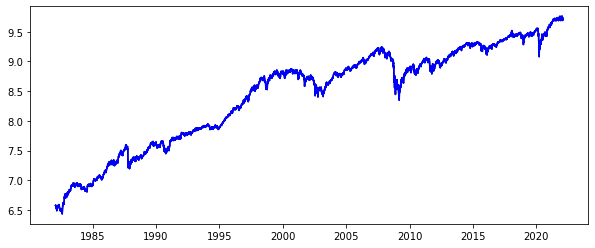

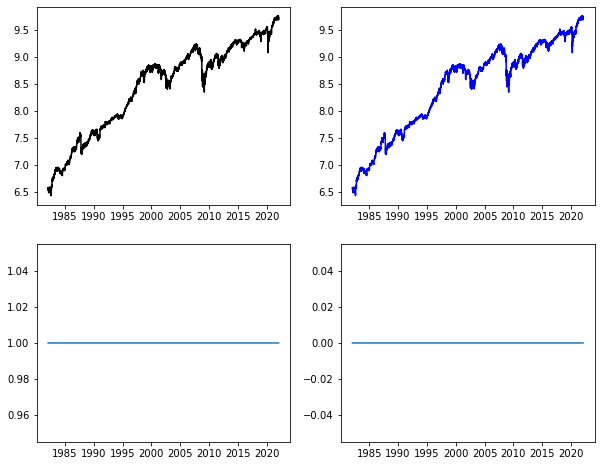




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nasdaq_40yr_3param.json
{   'params': {   'amounts': [0.8870374478929434, 0.99, -0.886716737524649],
                  'qs': [   -0.12702629195751486,
                            0.27827689832310626,
                            -0.28414146169379356]},
    'sd': 0.0789359025458102,
    'window': 40}
 1: Final value: $37709.85 (window = 40; sd = 0.079)

% in now: 0.9986833557468368
Actions taken: 774
Wrote params to ../data/pct_params/nasdaq_40yr_3param.json


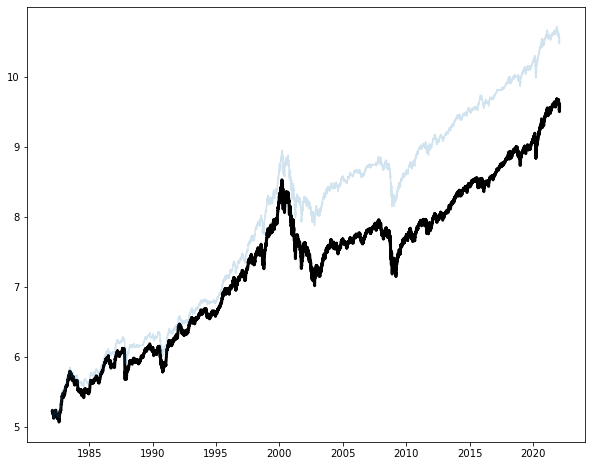

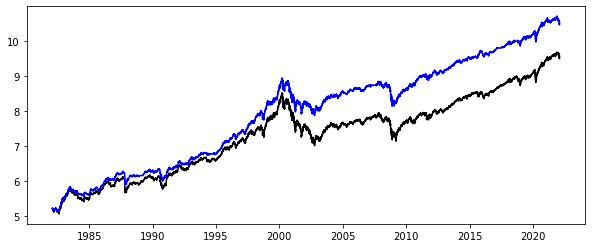

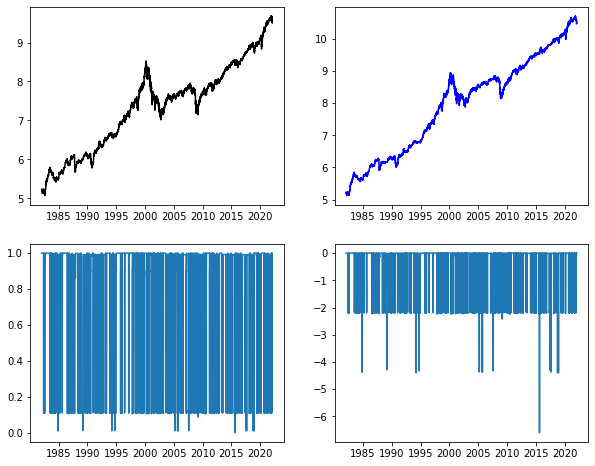



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nasdaq_40yr_2param.json
{   'params': {   'amounts': [0.99, -0.9847882982830337],
                  'qs': [0.5924374923784882, -0.07574750584502826]},
    'sd': 0.0789359025458102,
    'window': 45}
 1: Final value: $25006.08 (window = 45; sd = 0.079)

% in now: 0.014968976528035213
Actions taken: 453
Wrote params to ../data/pct_params/nasdaq_40yr_2param.json


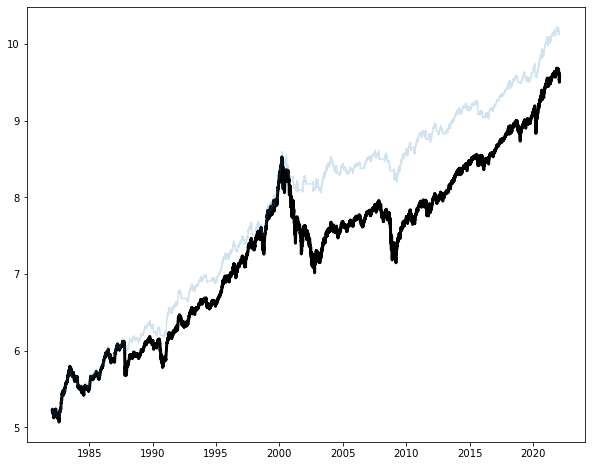

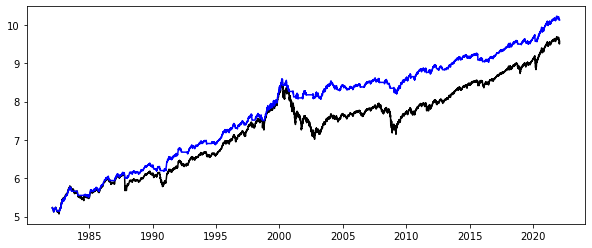

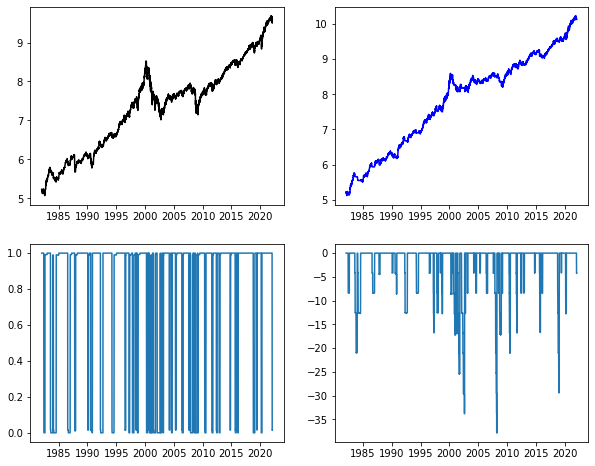



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1982-02-01
Successfully loaded params from ../data/pct_params/nasdaq_40yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.0859480775539192]},
    'sd': 0.13047125778304905,
    'window': 20}
 1: Final value: $14346.00 (window = 20; sd = 0.130)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_40yr_1param.json


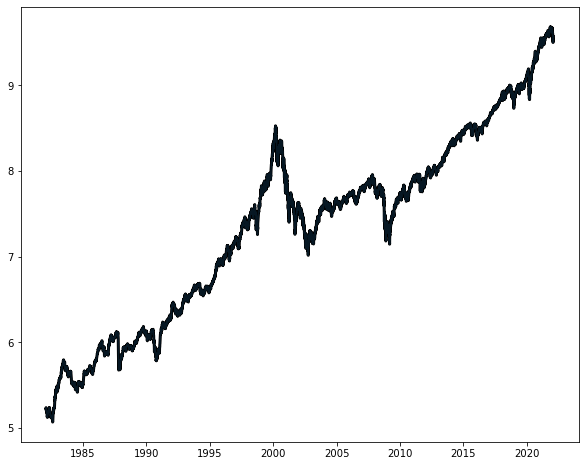

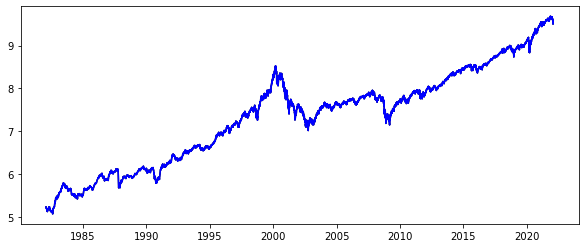

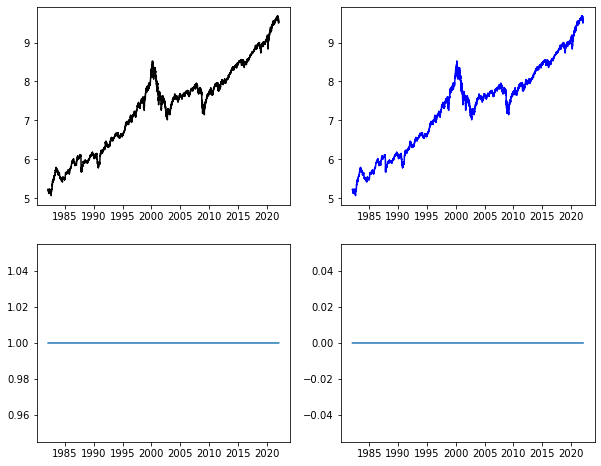

Percents in:
nyse: [1.0, 1.0, 1.0]
nasdaq: [0.9987, 0.015, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')